<a href="https://colab.research.google.com/github/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA/blob/main/Github_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive as drive
# drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
!rm -rf /content/COVID19_Pneumonia_Normal_Chest_Xray_PA # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA.git

/content
Cloning into 'COVID19_Pneumonia_Normal_Chest_Xray_PA'...
remote: Enumerating objects: 6884, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 6884 (delta 28), reused 40 (delta 10), pack-reused 6811
Receiving objects: 100% (6884/6884), 1.86 GiB | 33.50 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (7001/7001), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["COVID19_Pneumonia_Normal_Chest_Xray_PA"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  # local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 3
-Thư mục: normal, Số tệp: 2313
-Thư mục: covid, Số tệp: 2313
-Thư mục: pneumonia, Số tệp: 2313


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/COVID19_Pneumonia_Normal_Chest_Xray_PA

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/COVID19_Pneumonia_Normal_Chest_Xray_PA


In [7]:
# Set the path to your dataset
dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset'

In [8]:
import os

class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path):
    images = []
    # labels = [] # direct
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                img = Image(image_path, class_name)
                images.append(img)
                # labels.append(img.label) # direct
    # return images, labels # direct
    return images

images = load_images_from_folder(dataset_path)
# for class_name, imgs in images.items():
#     for img in imgs:
#         print(f"Path: {img.path}, Label: {img.label}")

Class normal


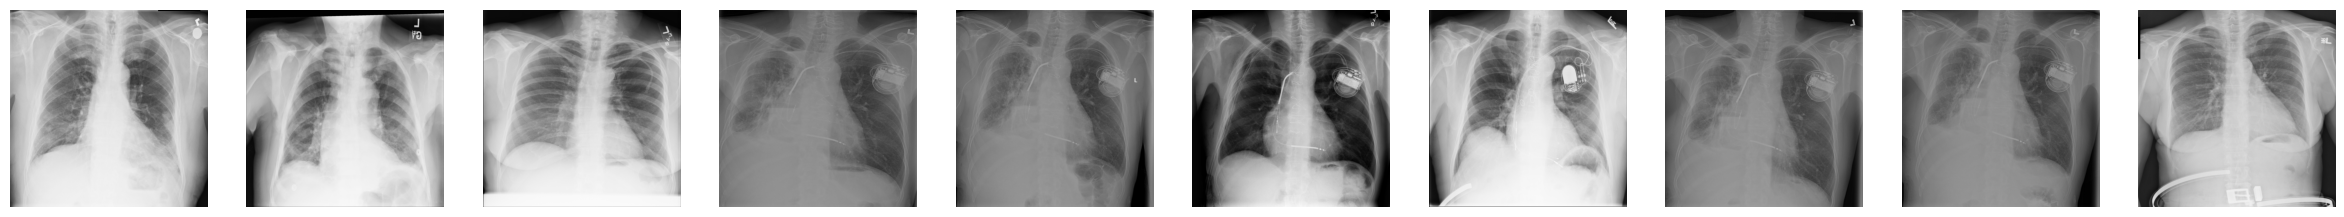

Class covid


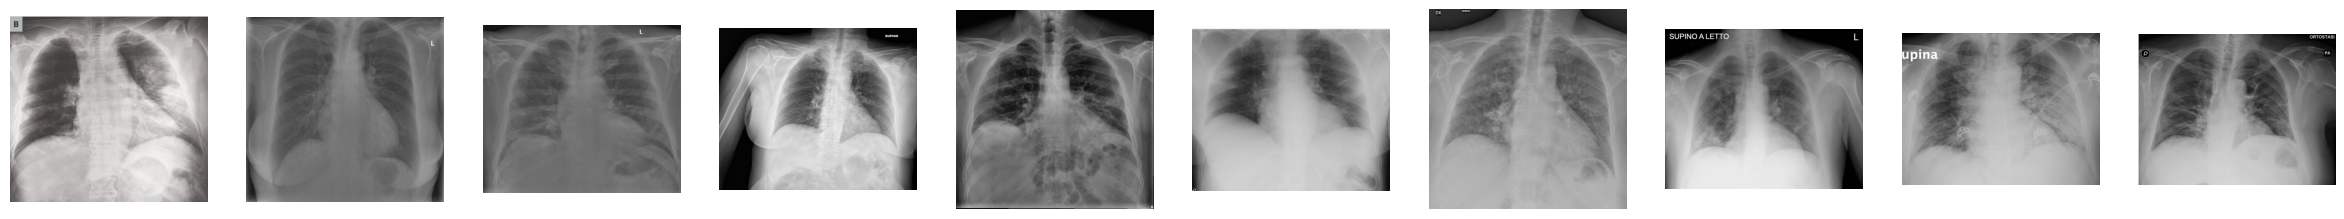

Class pneumonia


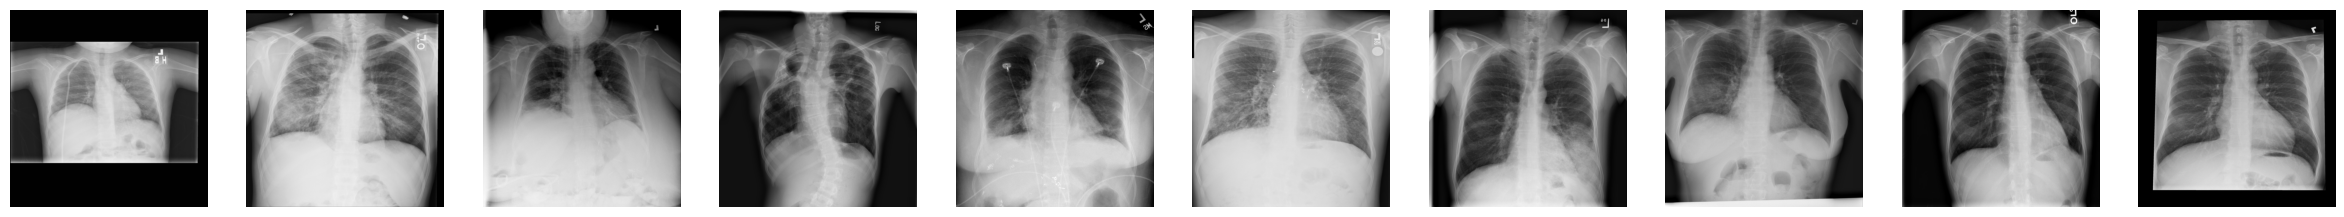

In [9]:
def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder(dataset_path)
imshow(images, 10)


In [10]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
# image_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/pneumonia/00001182_004.png"
print('images.keys:', images.keys())
print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['normal', 'covid', 'pneumonia'])
image_path: /content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/normal/00000002_000.png
Image Format: PNG
Image Mode: L
Image Size: (1024, 1024) pixels (Width: 1024, Height: 1024)
Image Colors: [(2409, 0), (45, 9), (519, 10), (750, 11), (697, 12), (722, 13), (801, 14), (854, 15), (299, 16), (96, 17), (56, 18), (59, 19), (69, 20), (59, 21), (71, 22), (71, 23), (73, 24), (83, 25), (85, 26), (97, 27), (168, 28), (156, 29), (133, 30), (127, 31), (123, 32), (116, 33), (115, 34), (109, 35), (107, 36), (107, 37), (105, 38), (102, 39), (124, 40), (110, 41), (105, 42), (119, 43), (137, 44), (134, 45), (146, 46), (173, 47), (150, 48), (150, 49), (156, 50), (191, 51), (195, 52), (242, 53), (295, 54), (292, 55), (346, 56), (400, 57), (399, 58), (430, 59), (495, 60), (537, 61), (563, 62), (711, 63), (691, 64), (733, 65), (746, 66), (857, 67), (972, 68), (1005, 69), (1094, 70), (1166, 71), (1224, 72), (1124, 73), (1196, 74), (1209, 75), (13

### CLAHE + Butterworth

In [11]:
import os
import cv2
import numpy as np
from shutil import copyfile
import pywt
def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)


# Define your preprocessing function here
import pywt
def preprocess_func(image):
    # Unsharp Masking
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    # Bilateral Filter Denoising
    denoised_image = cv2.bilateralFilter(unsharp_mask, d=9, sigmaColor=75, sigmaSpace=75)

    # return result
    return denoised_image

# Usage:
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/covid'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/COVID19_Pneumonia_Normal_Chest_Xray_PA/CLAHE_Butterworth_sample/covid'
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset'

# Sử dụng
dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/01_08_USM'
preprocess_and_copy(dataset_path, output_path, preprocess_func)
